In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [3]:
df = pd.read_csv("CO2 Emissions_Canada.csv")
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [5]:
cdf = df[['Engine Size(L)','Cylinders','Fuel Consumption City (L/100 km)','CO2 Emissions(g/km)']]
cdf.head(9)

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),CO2 Emissions(g/km)
0,2.0,4,9.9,196
1,2.4,4,11.2,221
2,1.5,4,6.0,136
3,3.5,6,12.7,255
4,3.5,6,12.1,244
5,3.5,6,11.9,230
6,3.5,6,11.8,232
7,3.7,6,12.8,255
8,3.7,6,13.4,267


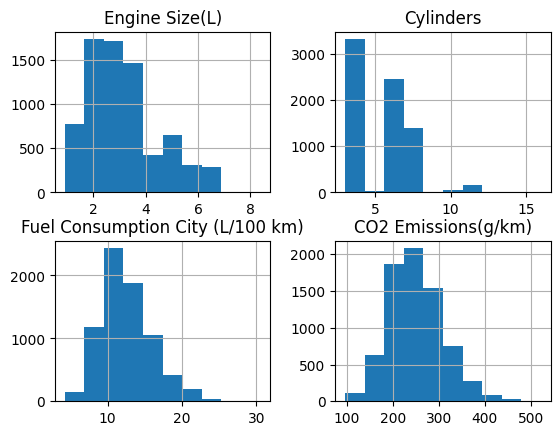

In [7]:
cdf.hist()
plt.show()

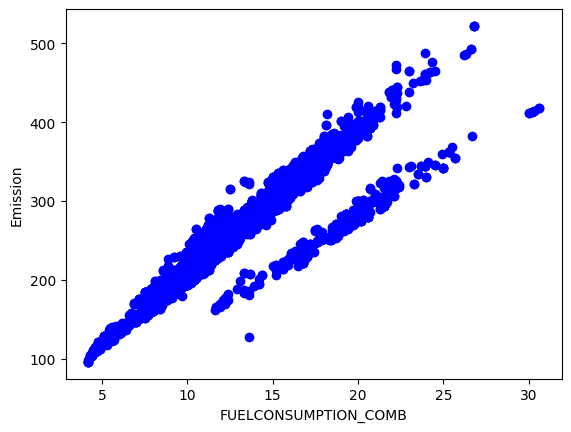

In [9]:
plt.scatter(cdf['Fuel Consumption City (L/100 km)'], cdf['CO2 Emissions(g/km)'],  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

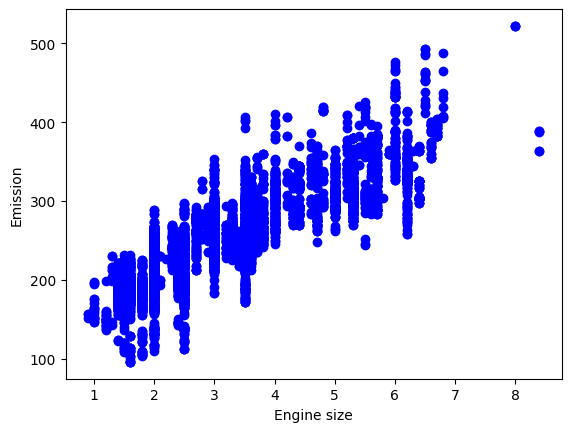

In [11]:
plt.scatter(cdf['Engine Size(L)'], cdf['CO2 Emissions(g/km)'],  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

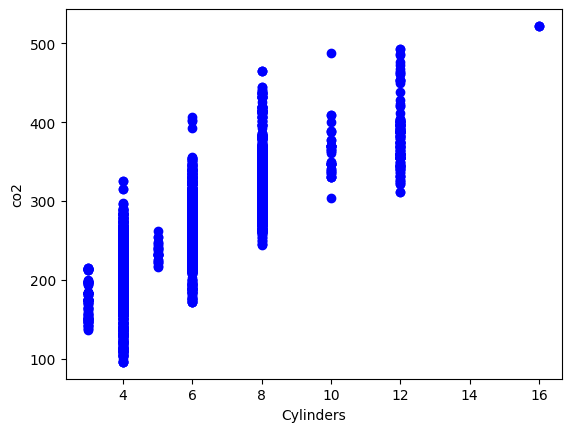

In [13]:
plt.scatter(cdf['Cylinders'], cdf['CO2 Emissions(g/km)'], color='blue')
plt.xlabel('Cylinders')
plt.ylabel('co2')
plt.show()

In [14]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

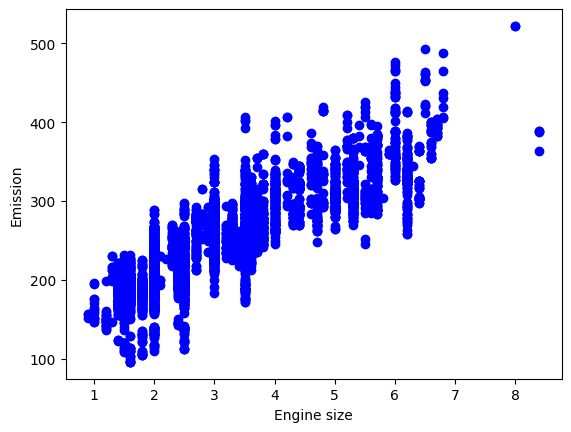

In [16]:
plt.scatter(train['Engine Size(L)'], train['CO2 Emissions(g/km)'],  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [17]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Engine Size(L)']])
train_y = np.asanyarray(train[['CO2 Emissions(g/km)']])
regr.fit(train_x, train_y)

print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[36.68588728]]
Intercept:  [134.25813329]


Text(0, 0.5, 'Emission')

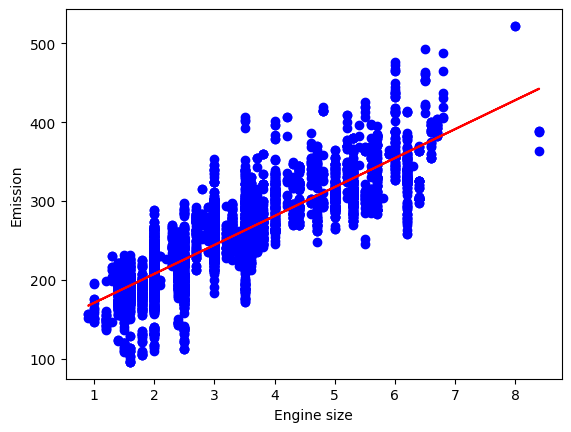

In [19]:
plt.scatter(train['Engine Size(L)'],train['CO2 Emissions(g/km)'],  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [20]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Engine Size(L)']])
test_y = np.asanyarray(test[['CO2 Emissions(g/km)']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 23.54
Residual sum of squares (MSE): 959.97
R2-score: 0.73
